### 0827 과제 당뇨병 예측 (지도학습&회귀)
- 데이터셋: sklearn load_diabetes		--> 기본: scaled data 제공
- 학습방법: 지도학습/회귀
- 알고리즘: KNNRegressor

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 로드 & 타겟/피쳐 생성

In [3]:
# 피쳐 스케일링 False 데이터 로드
dataDict = load_diabetes(as_frame=True, scaled=False)
print( dataDict.keys() )

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
# 데이터 변수명 확인
print(dataDict.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
# DF & 타겟(당뇨병 수치?) 변수 생성
rawDF = dataDict['data']			# DF
targetSR = dataDict['target']		# Series


In [6]:
print(type(targetSR))	
targetSR

<class 'pandas.core.series.Series'>


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [7]:
# rawDF 데이터 확인
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


결측값 없고 모든 변수 수치형 데이터

In [8]:
# 중복값 확인
rawDF.duplicated().sum()

0

중복 데이터 없음

In [9]:
# 결측치 확인
rawDF.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

모든 변수에 대해 null값 없음

In [10]:
# 변수 percentile 확인
rawDF.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


##### 타겟 & 피쳐간 상관계수 확인

In [11]:
totDF = rawDF.copy()
totDF['diabetes'] = targetSR					# 당뇨병 수치 칼럼 추가
totDF.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0


In [12]:
corr_list = totDF.corr()['diabetes']
corr_list

age         0.187889
sex         0.043062
bmi         0.586450
bp          0.441482
s1          0.212022
s2          0.174054
s3         -0.394789
s4          0.430453
s5          0.565883
s6          0.382483
diabetes    1.000000
Name: diabetes, dtype: float64

- feature: bmi, bp, s1, s2, s4, s5

##### 피쳐 & 타겟 scatter plot

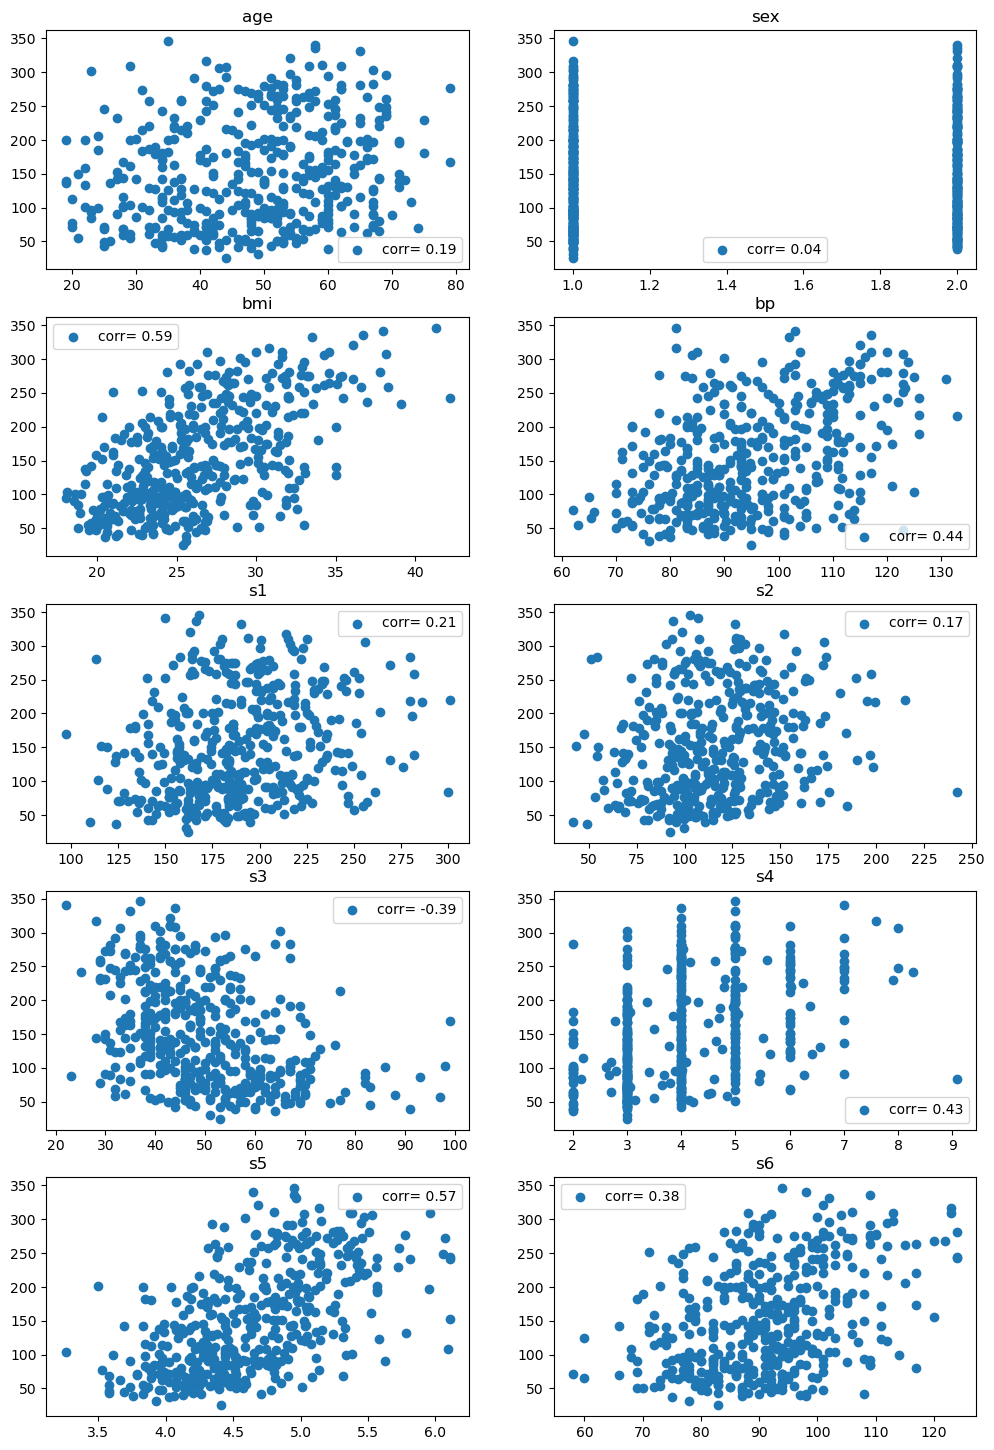

In [13]:
fig, ax = plt.subplots(5,2,figsize=(12,18))

# for i in range(5):
#     for j in range(2):
#         ax[i,j].scatter( totDF[totDF.columns[5*i + j]], totDF['diabetes'], 
#                         label=f'corr= {corr_list}')

for idx in range(10):
    ax[idx//2][idx%2].scatter( totDF[totDF.columns[idx]], totDF['diabetes'], 
                        label=f'corr= {round(corr_list[idx], 2)}')
    ax[idx//2][idx%2].set_title(f'{totDF.columns[idx]}')
    ax[idx//2][idx%2].legend()
        
plt.show()

#### 피쳐 & 타겟 선언
- 피쳐: bmi, s5
- 타겟: targetSR

In [14]:
featureDF = totDF[ ['bmi','s5']]

# 피쳐&타겟 차원
print(f'featureDF: {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR: {targetSR.shape}, {targetSR.ndim}D')

featureDF: (442, 2), 2D
targetSR: (442,), 1D


#### 학습용 & 테스트용 데이터셋 분리

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=3
													)

In [18]:
print(f'X_train: {X_train.shape}, {X_train.ndim}D', f'y_train: {y_train.shape}, {y_train.ndim}D')
print(f'X_test: {X_test.shape}, {X_test.ndim}D', f'y_train: {y_test.shape}, {y_test.ndim}D')

X_train: (331, 2), 2D y_train: (331,), 1D
X_test: (111, 2), 2D y_train: (111,), 1D


##### 피쳐 스케일링
- minmaxscaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
mmScaler = MinMaxScaler()
mmScaler.fit(X_train)

MinMaxScaler()

In [21]:
# 학습용/테스트용 데이터셋 전용 속성값 설정
X_train_scaled = mmScaler.transform(X_train)			# X_train으로 생성한 Scaler 기준으로 
														# X_train 값 변환

X_test_scaled = mmScaler.transform(X_test)				# X_train으로 생성한 Scaler 기준으로 
														# X_test 값 변환

#### 학습/훈련

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [25]:
# 학습 후 파라미터 확인
model.n_samples_fit_

331

#### 성능평가

In [26]:
model.score(X_test_scaled, y_test)

0.2791720307362038

#### 최적 K 찾기

In [39]:
scores={}

for k in range(1, model.n_samples_fit_ + 1):
    
	model.n_neighbors = k

	score = model.score(X_test_scaled, y_test)

	scores[k] = score

print(scores)
sort_k = sorted(scores.items(), key=lambda x:x[1], reverse=True)
print(sort_k[:3])
best_k = sort_k[0][0]
print(best_k)

{1: 0.013885812618199767, 2: 0.14318530318777367, 3: 0.22816122308736408, 4: 0.2380121990697357, 5: 0.2791720307362038, 6: 0.2933208010798184, 7: 0.3217480998498935, 8: 0.3037083052919428, 9: 0.29713316812970947, 10: 0.31896059155265544, 11: 0.3330830136867097, 12: 0.33375849760618825, 13: 0.3706059117963826, 14: 0.3801974525349302, 15: 0.38756829226275336, 16: 0.3759674080064914, 17: 0.385711287464531, 18: 0.38675803243199125, 19: 0.3860447429799634, 20: 0.3820318777366978, 21: 0.3846537537089585, 22: 0.3705433955053704, 23: 0.3730774727115689, 24: 0.37759905828255136, 25: 0.37880259383572157, 26: 0.383555854820545, 27: 0.38640612985234823, 28: 0.3880796809548962, 29: 0.3915911231040705, 30: 0.39336661384946536, 31: 0.38432627609406167, 32: 0.38562282967623907, 33: 0.3825577462357751, 34: 0.38099102201903656, 35: 0.3805669737064916, 36: 0.38493588368268195, 37: 0.38154876452440367, 38: 0.37774225271806106, 39: 0.38187178242669073, 40: 0.3839312673572658, 41: 0.3812583070077594, 42: 0.

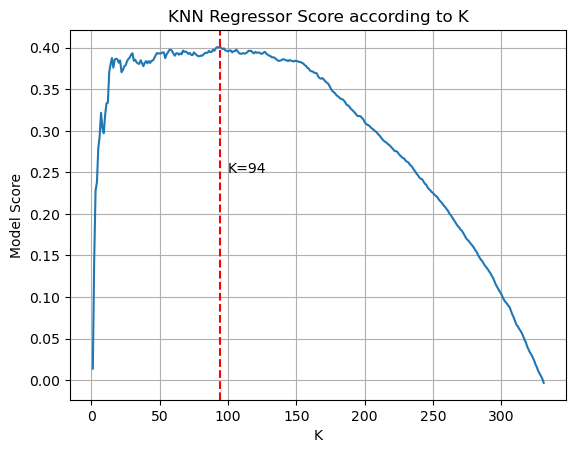

In [48]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.title("KNN Regressor Score according to K")
plt.xlabel("K")
plt.ylabel("Model Score")
plt.axvline(best_k, 0, 1, linestyle ='dashed', color = 'red')
plt.text( 100, 0.25, f'K={best_k}')
plt.show()

In [50]:
# 최적 K 반영
model.n_neighbors = best_k
print(model.n_neighbors)

94


In [49]:
model.fit(X_train_scaled, y_train)

model.score(X_test_scaled, y_test)

-0.003311160477942554

#### 당뇨 수치 예측

In [52]:
n_data = [ 20.4, 2.34 ]
n_dataDF = pd.DataFrame(  [n_data], columns=['bmi','s5'])
n_dataDF

,bmi,s5
0,20.4,2.34


In [53]:
n_dataDF_scale = mmScaler.transform(n_dataDF)
n_dataDF_scale

array([[ 0.10300429, -0.32226473]])

In [54]:
model.predict(n_dataDF_scale)

array([95.63829787])

#### [번외] 데이터 Load 유형

In [14]:
# 기본: ndarray 형태 반환
# 반환값: Bunch 객체	(dictionary와 유사)
dataDict = load_diabetes()
dataDict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [15]:
type(dataDict['data'])

numpy.ndarray

In [16]:
# 기본: DataFrame 형태 반환
dataDict = load_diabetes(as_frame=True)
dataDict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [17]:
type(dataDict['data'])

pandas.core.frame.DataFrame

In [18]:
# 기본: DataFrame 형태 반환
# 반환값: tuple로 data와 target만 반환
data, target = load_diabetes(return_X_y=True)
print(type(data))

<class 'numpy.ndarray'>
